# Analysis of Canadian Housing Market

The Canadian housing market is currently a focal point of discussions. Therefore, I planned to do this project which will give us an insight about canadian house market.


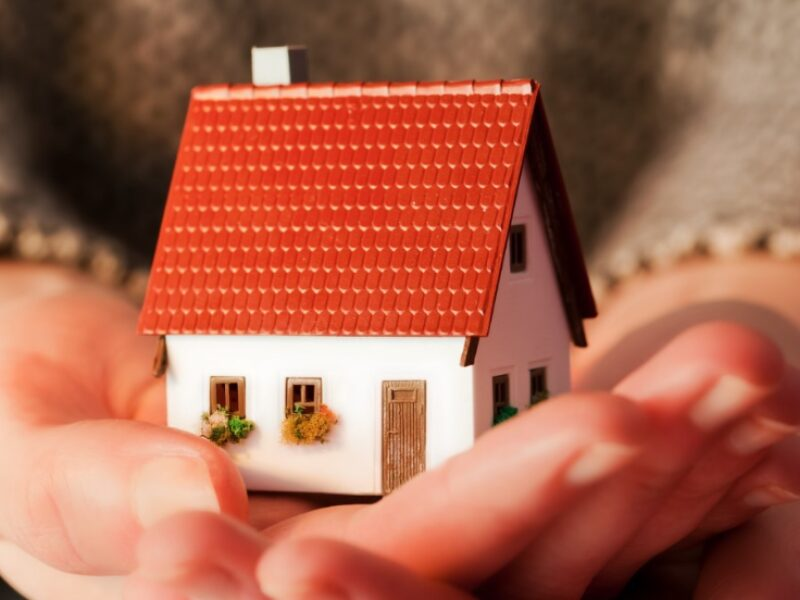

I used  <a href="https://www.kaggle.com/datasets/lameesmohammad/home-prices-in-canada"> home prices in Canada </a> dataset which is available free on kaggle. Data set contain two csv files :
1. Average home prices in Canadian provinces
2. Average home prices in major Canadian cities

In the process of conducting data analysis, I utilized Python libraries such as pandas, numpy, seaborn and matplotlib.

## Downloading the Dataset


In [2]:
!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/lameesmohammad/home-prices-in-canada'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khushiisaini28
Your Kaggle Key: ··········


100%|██████████| 1.22k/1.22k [00:00<00:00, 350kB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './home-prices-in-canada'

In [6]:
import os
os.listdir(data_dir)

['Average home prices in major Canadian cities.csv',
 'Average home prices in Canadian provinces.csv']

## Data Preparation and Cleaning

The most important step of data analysis is to understand the data and to clean it so that analysis can be performed correctly without any error. Data cleaning involves accounting any null, duplicate or any incorrectly formatted value.



In [7]:
import pandas as pd
import numpy as np

In [8]:
province_data = pd.read_csv(data_dir + '/Average home prices in Canadian provinces.csv')
city_data = pd.read_csv(data_dir + '/Average home prices in major Canadian cities.csv')

Now that we have loaded the data set. Let's explore the two csv files that it contains.

In [9]:
province_data.info()
province_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                13 non-null     object 
 1   Price Januray 2022  13 non-null     float64
 2   Price Januray 2021  13 non-null     float64
 3   y/y % change        13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 544.0+ bytes


,Area,Price Januray 2022,Price Januray 2021,y/y % change
0,Canada,748439.0,618587.0,21.0
1,British Columbia,1040888.0,843918.0,23.3
2,Alberta,443398.0,403261.0,10.0
3,Manitoba,338772.0,304759.0,11.2
4,Saskatchewan,285700.0,267100.0,7.0


"Average home prices in Canadian provinces.csv" has four columns and 13 rows. The four columns are as follows:

1. Area: It contains the names of all provinces in Canada.
2. Price January 2022: This column is of float data type and displays the average house prices in each province as of January 2022.
3. Price January 2021: This column is of float data type and displays the average house prices in each province as of January 2021.
4. y/y % change: This column is of float data type and provides information about the percentage change in prices for each province.

We get to know that this file contains a row for cummulative data about Canada as an entire region as well.



In [10]:
city_data.info()
city_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Major City       17 non-null     object
 1   Province         17 non-null     object
 2   Price 2021-2022  17 non-null     int64 
 3   Population       17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 672.0+ bytes


,Major City,Province,Price 2021-2022,Population
0,Toronto,Ontario,1210889,2930000
1,Ottawa,Ontario,752442,994837
2,Hamilton,Ontario,976423,579200
3,Montreal,Quebec,583295,1780000
4,Edmonton,Alberta,493543,981280


"Average home prices in major Canadian cities.csv" has four columns and 17 rows. The four columns are as follows:

1. Major City: It contains the names of all major cities in Canada.
2. Province: It contains the names of the provincies in which the cities are located.
3. 	Price 2021-2022: This column is of integer data type and displays the average house prices in each major cities during the year of 2021-202.
4. Population: This column is of integer data type and displays the population of the city.


As both of the CSV files do not contain any null value therefore we don't have to clean the data.

## Exploratory Analysis and Visualization

Now, let's do some analysis on the data sets.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [11]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Canada
To begin, let's represent the overall shift in the Canadian housing market by creating a bar graph.

Text(0.5, 1.0, 'Housing price of Canada 2021 v/s 2022')

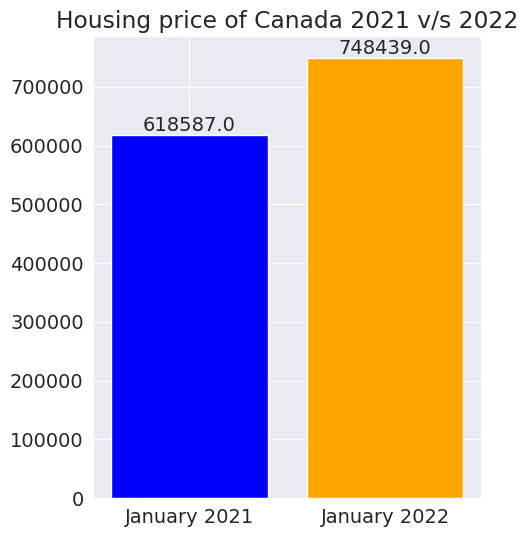

In [12]:
plt.figure(figsize=(5, 6))
plt.bar(['January 2021', 'January 2022'], [province_data['Price Januray 2021'][0], province_data['Price Januray 2022'][0]], color = ['blue','orange'])
plt.text(0,province_data['Price Januray 2021'][0] ,str(province_data['Price Januray 2021'][0]), ha='center', va='bottom')
plt.text(1,province_data['Price Januray 2022'][0] ,str(province_data['Price Januray 2022'][0]), ha='center', va='bottom')
plt.title("Housing price of Canada 2021 v/s 2022")

 For numerical analysis of the data we calculate the price difference and the percentage change and show the output accordingly.

In [13]:
price_diff = province_data['Price Januray 2022'][0] - province_data['Price Januray 2021'][0]
percentage_diff =  ((province_data['Price Januray 2022'][0] - province_data['Price Januray 2021'][0]) / province_data['Price Januray 2021'][0]) * 100

if price_diff > 0 :
  print("There's an increase in houses prices in Canada by $%d, representing a %f percent increase."%(price_diff,percentage_diff))
else:
  print("There's a decrease in houses prices in canada by $%d, representing a %f decrease.",price_diff)

There's an increase in houses prices in Canada by $129852, representing a 20.991712 percent increase.


The graph illustrates the rise in prices from January 2021 to January 2022. Upon conducting numerical analysis, we can deduce that there has been a collective increase of approximately 21% in the Canadian housing market.

### Province

Following the comprehensive analysis, let's expand our perspective by examining the individual provinces of Canada.

To obtain an initial impression of the housing market in various Canadian provinces, we create a multiple horizontal bar graph that compares the prices in January 2021 and January 2022 for each province

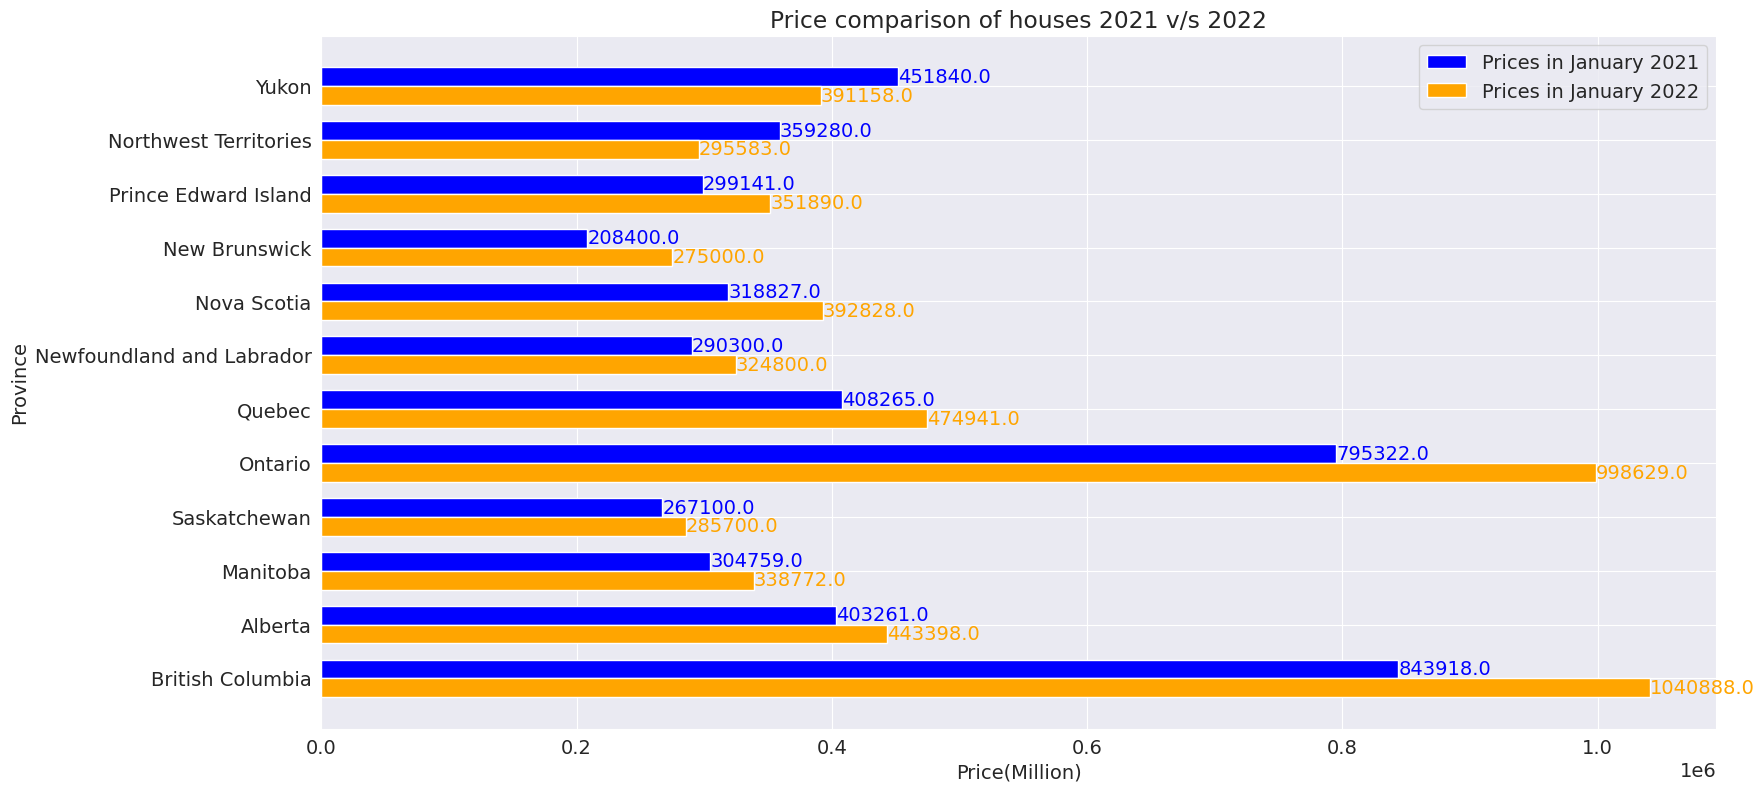

In [14]:
bar_width = 0.35
x = np.arange(len(province_data['Area'][1:]))

fig, ax = plt.subplots(figsize=(18, 9))


bar1 = ax.barh(x + bar_width/2, province_data['Price Januray 2021'][1:], bar_width, label='Prices in January 2021', color='blue')

bar2 = ax.barh(x - bar_width/2, province_data['Price Januray 2022'][1:], bar_width, label='Prices in January 2022', color='orange')

ax.set_ylabel('Province')
ax.set_xlabel('Price(Million)')
ax.set_title('Price comparison of houses 2021 v/s 2022')
ax.set_yticks(x)
ax.set_yticklabels(province_data['Area'][1:])
ax.legend()

for i, val in enumerate(province_data['Price Januray 2021'][1:]):
    ax.text(val + 10, i + bar_width/2, str(val), ha='left', va='center', color='blue')

for i, val in enumerate(province_data['Price Januray 2022'][1:]):
    ax.text(val + 10, i - bar_width/2, str(val), ha='left', va='center', color='orange')

plt.show()

It's evident that there has been a decline in housing prices in Yukon and Northwest Territories. Additionally, Ontario and British Columbia stand out with the two longest bars, indicating significant price increases compared to other provinces.

To conduct a more in-depth analysis, we will create two bar graphs that illustrate the variance in price changes and percentage changes compared to January 2021 and January 2022.

To emphasize the significance of the differences in the plot, we will use the color green for decreases and red for increases in prices/percentages

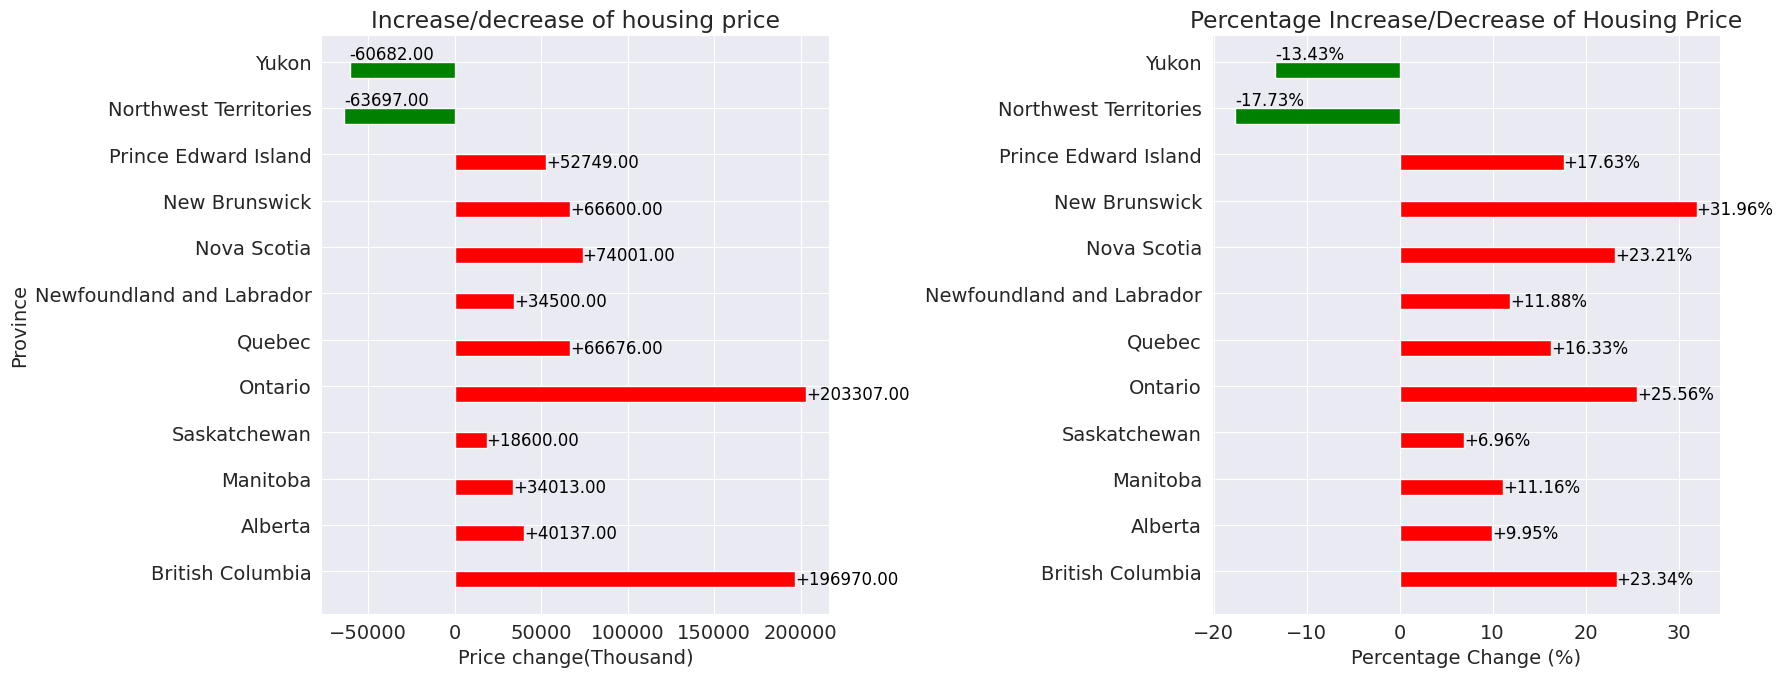

In [15]:
bar_width = 0.35
x = np.arange(len(province_data['Area'][1:]))

price_difference = province_data['Price Januray 2022'][1:] - province_data['Price Januray 2021'][1:]

colors_price = ['red' if diff > 0 else 'green' for diff in price_difference]

percentage_change = ((province_data['Price Januray 2022'][1:] - province_data['Price Januray 2021'][1:]) / province_data['Price Januray 2021'][1:]) * 100

colors_percentage = ['red' if pct > 0 else 'green' for pct in percentage_change]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

bar1 = ax1.barh(x - bar_width/2, price_difference, bar_width, color=colors_price)
ax1.set_ylabel('Province')
ax1.set_xlabel('Price change(Thousand)')
ax1.set_title('Increase/decrease of housing price')
ax1.set_yticks(x)
ax1.set_yticklabels(province_data['Area'][1:])

for i, val in enumerate(price_difference):
    if val >= 0:
        ax1.text(val, i - bar_width/2, f'+{val:.2f}', va='center', color='black', fontsize=12)
    else:
        ax1.text(val, i + bar_width/2, f'{val:.2f}', va='center', color='black', fontsize=12)

bar2 = ax2.barh(x - bar_width/2, percentage_change, bar_width, color=colors_percentage)
ax2.set_ylabel('')
ax2.set_xlabel('Percentage Change (%)')
ax2.set_title('Percentage Increase/Decrease of Housing Price')
ax2.set_yticks(x)
ax2.set_yticklabels(province_data['Area'][1:])

for i, val in enumerate(percentage_change):
    if val >= 0:
        ax2.text(val, i - bar_width/2, f'+{val:.2f}%', va='center', color='black', fontsize=12)
    else:
        ax2.text(val, i + bar_width/2, f'{val:.2f}%', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


The above plots provide valuable insights into our dataset :
1. Saskatchewan exhibited the smallest fluctuations in its housing market, with an approximately 10% increase.

2. Only two provinces experienced a decline in housing prices: Yukon and Northwest Territories, with decreases of 60682 and 63697, respectively.

3. Ontario and British Columbia saw the most substantial increases in housing prices when considering absolute values.

4. New Brunswick's housing market experienced the most significant percentage change.

5. Nova Scotia and British Columbia had similar percentage changes.

6. When analyzing the percentage change, it's evident that housing prices in British Columbia, Ontario, and Nova Scotia increased by approximately one-fourth.

### Major Canadian Cities

Now, let's delve into the analysis of housing prices in 17 major Canadian cities. To do this, we will create a bar graph

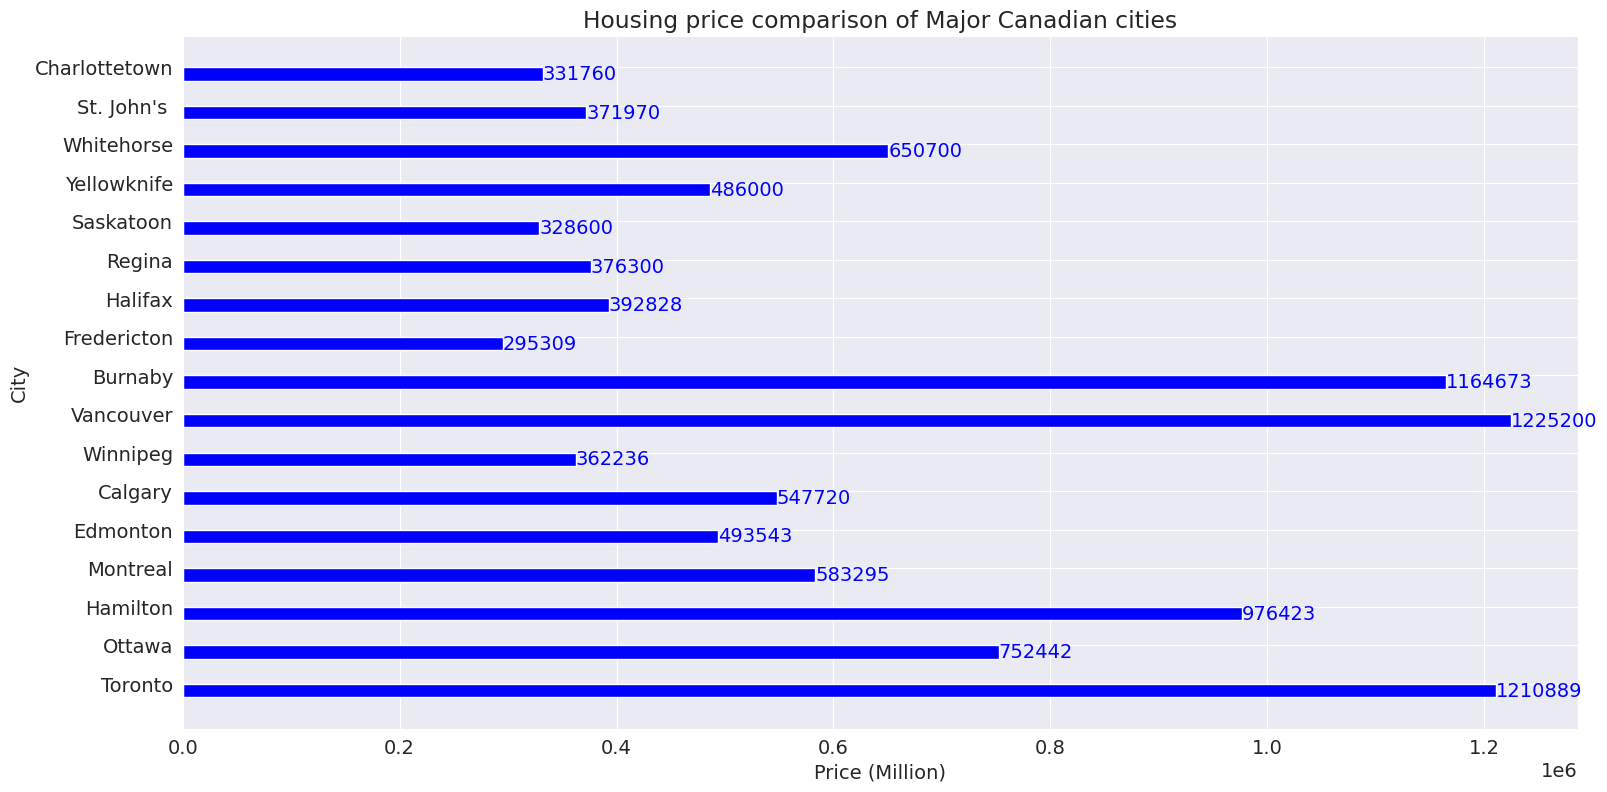

In [16]:
bar_width = 0.35
x = np.arange(len(city_data['Major City']))

fig, ax = plt.subplots(figsize=(18, 9))

bar1 = ax.barh(x - bar_width/2, city_data['Price 2021-2022'], bar_width, color='blue')

ax.set_ylabel('City')
ax.set_xlabel('Price (Million)')
ax.set_title('Housing price comparison of Major Canadian cities')
ax.set_yticks(x)
ax.set_yticklabels(city_data['Major City'])

for i, val in enumerate(city_data['Price 2021-2022']):
    ax.text(val + 10, i - bar_width/2, str(val), ha='left', va='center', color='blue')

plt.show()

We get to know the following by analyzing the above bar graph:

1. Toronto and Vancouver rank as the most expensive cities for purchasing a house, closely followed by Burnaby with a difference of approximately $60,000.

2. Fredericton emerges as the most affordable city to buy a house.

3. St. John, Winnipeg, and Regina exhibit a similar housing market.

4. Montreal and Whitehorse have prices that are roughly half the cost of Ontario and British Columbia.

We have a "population" column in our dataset, so let's attempt to analyze whether there is any correlation between population and house prices. To establish a correlation relationship, we can calculate the correlation coefficient or create a scatter plot.

In [17]:
correlation_coefficient = city_data["Price 2021-2022"].corr(city_data["Population"])
print("The correlation coefficient is:", correlation_coefficient)

The correlation coefficient is: 0.4546442938925804


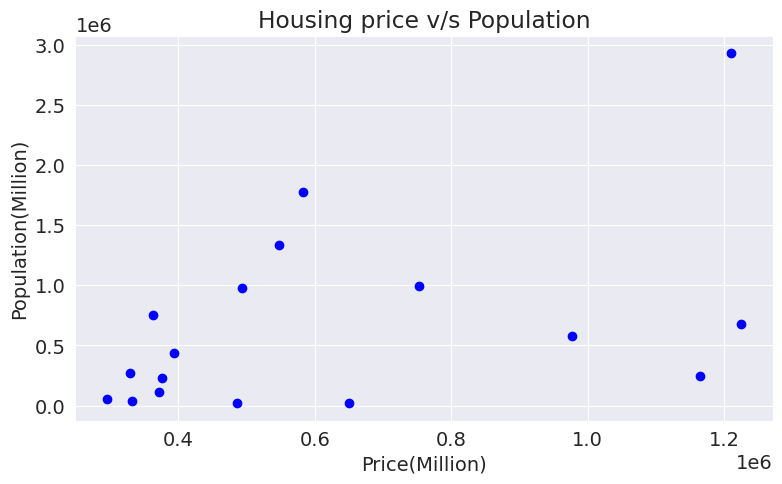

In [19]:
plt.scatter(city_data['Price 2021-2022'], city_data['Population'],color='blue')
plt.title("Housing price v/s Population")
plt.xlabel("Price(Million)")
plt.ylabel("Population(Million)")
plt.show()

The correlation coefficient quantifies how one variable behaves concerning another. The correlation coefficient between population and price is 0.46, which falls within the range of moderate positive correlation.

Upon examining the scatter plot, it is evident that, for the most part, areas with lower populations tend to have lower prices. However, there are some outliers scattered throughout.

In conclusion, based on the analysis, we cannot definitively assert a direct relationship between population and prices.

### General Q&A

##### Most expensive province of Canada

In [ ]:
exp_prov = province_data['Price Januray 2022'].max()
data_exp_prov = province_data[province_data['Price Januray 2022'] == exp_prov].index
print("The most expensive province is %s having average house price $ %d"% (province_data.loc[data_exp_prov[0]]['Area'], province_data.loc[data_exp_prov[0]]['Price Januray 2022']))

The most expensive major city is Vancouver having average house price $ 1225200
The most expensive province is British Columbia having average house price $ 1040888
Yes, the most expensive city,Vancouver, is in the most expensive province,British Columbia.


##### Most expensive city of Canada

In [20]:
exp_city = city_data['Price 2021-2022'].max()
data_exp_city = city_data[city_data['Price 2021-2022'] == exp_city].index
print("The most expensive major city is %s having average house price $ %d"% (city_data.loc[data_exp_city[0]]['Major City'], city_data.loc[data_exp_city[0]]['Price 2021-2022']))

The most expensive major city is Vancouver having average house price $ 1225200


##### Least expensive province of Canada

In [23]:
exp_prov = province_data['Price Januray 2022'].min()
data_exp_prov = province_data[province_data['Price Januray 2022'] == exp_prov].index
print("The least expensive province is %s having average house price $ %d"% (province_data.loc[data_exp_prov[0]]['Area'], province_data.loc[data_exp_prov[0]]['Price Januray 2022']))

The least expensive province is New Brunswick having average house price $ 275000


##### Least expensive city of Canada

In [24]:
exp_city = city_data['Price 2021-2022'].min()
data_exp_city = city_data[city_data['Price 2021-2022'] == exp_city].index
print("The least expensive major city is %s having average house price $ %d"% (city_data.loc[data_exp_city[0]]['Major City'], city_data.loc[data_exp_city[0]]['Price 2021-2022']))

The least expensive major city is Fredericton having average house price $ 295309
